# 자연상수 $e$

아래 자료들을 참고하여 실습하면서 작성한 노트북입니다.

* [자연상수 e의 역사 이야기 / 뜻과 정의, 개념 / 값, 수식, 활용](https://blog.naver.com/prayer2k/222471310302), 수냐의 수학카페
* [자연 상수 e](https://terms.naver.com/entry.naver?docId=3568951&cid=58944&categoryId=58970), 네이버 지식백과
* [자연상수 e의 의미](https://angeloyeo.github.io/2019/09/04/natural_number_e.html), 공돌이의 수학정리노트
* [자연로그의 밑](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8%EC%9D%98_%EB%B0%91), 위키백과
* [e  (mathematical constant)](https://en.wikipedia.org/wiki/E_(mathematical_constant)), Wikipedia

자연상수 $e$를 주로 세 가지 방법으로 정의할 수 있다고 합니다.

* 극한을 사용
* 적분을 사용
* 맥클러린 급수를 사용

여기서는 극한을 사용하여 정의하는 방법만을 실습합니다.

## 극한을 사용하여 정의하는 방법

### 지수와 지수거듭제곱의 관계로부터 정의 (네이피어)

10의 제곱근, 제곱근의 제곱근 구하기를 반복해 나가면서 발견한 패턴을 활용하여 자연상수 $e$를 정의합니다.

In [1]:
for i in range(15):
    m = 2**i
    v = pow(10, 1/m)
    
    str = f'10^(1/{m})'
    print(f'{str:>15} = {v:>15.12f}')

       10^(1/1) = 10.000000000000
       10^(1/2) =  3.162277660168
       10^(1/4) =  1.778279410039
       10^(1/8) =  1.333521432163
      10^(1/16) =  1.154781984689
      10^(1/32) =  1.074607828321
      10^(1/64) =  1.036632928438
     10^(1/128) =  1.018151721718
     10^(1/256) =  1.009035044841
     10^(1/512) =  1.004507364254
    10^(1/1024) =  1.002251148293
    10^(1/2048) =  1.001124941400
    10^(1/4096) =  1.000562312602
    10^(1/8192) =  1.000281116788
   10^(1/16384) =  1.000140548517


위 결과를 아래의 식으로 표현하면 $m$이 2 배 증가할 때 $t$는 반으로 줄어드는 것처럼 보입니다.

$$
10^{1 \over m} = 1 + t
$$

반비례 관계인 두 수의 곱은 일정한 값이 되므로 $m$과 $t$를 곱해 봅니다. 

In [2]:
m_arr = []
m_times_t_arr = []

for i in range(20):
    m = 2**i
    v = pow(10, 1/m)
    t = v - 1
    m_times_t = m * t
    
    str = f'{m:6} x {t:.12f}'
    print(f'{str:22} = {m_times_t:.12f}')
    
    m_arr.append(m)
    m_times_t_arr.append(m_times_t)

     1 x 9.000000000000 = 9.000000000000
     2 x 2.162277660168 = 4.324555320337
     4 x 0.778279410039 = 3.113117640156
     8 x 0.333521432163 = 2.668171457307
    16 x 0.154781984689 = 2.476511755031
    32 x 0.074607828321 = 2.387450506282
    64 x 0.036632928438 = 2.344507420013
   128 x 0.018151721718 = 2.323420379927
   256 x 0.009035044841 = 2.312971479411
   512 x 0.004507364254 = 2.307770498285
  1024 x 0.002251148293 = 2.305175851943
  2048 x 0.001124941400 = 2.303879986954
  4096 x 0.000562312602 = 2.303232418647
  8192 x 0.000281116788 = 2.302908725494
 16384 x 0.000140548517 = 2.302746901663
 32768 x 0.000070271789 = 2.302665995434
 65536 x 0.000035135277 = 2.302625543743
131072 x 0.000017567484 = 2.302605318255
262144 x 0.000008783704 = 2.302595205605
524288 x 0.000004391842 = 2.302590149338


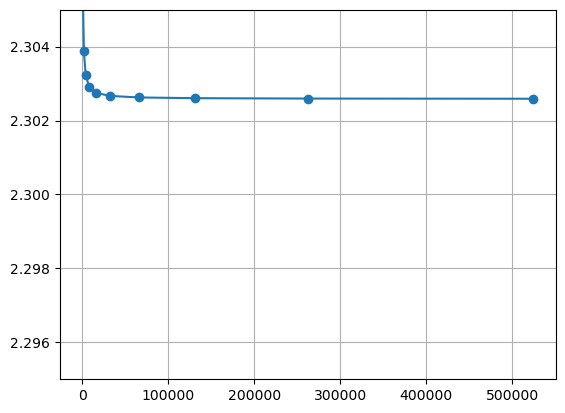

In [3]:
import matplotlib.pyplot as plt

plt.plot(m_arr, m_times_t_arr, marker='o')
plt.ylim(2.295, 2.305)
plt.grid(True)
plt.show()

그랬더니 $m$이 증가함에 따라 $m \times t$는 어떤 값으로 수렴하는 듯합니다.

$$
m \times t \approx 2.302...
$$

$m$을 $t$로 표현하고 수식에 대입하면 다음과 같이 됩니다.

$$
m \approx {2.302... \over t}
$$

$$
10^{t \over 2.302...} \approx 1 + t
$$

위 식을 아래와 같이 변형할 수 있습니다.

$$
(10^{1 \over 2.302...})^t \approx 1 + t
$$

이제 상수 $10^{1 \over 2.302...}$를 임의의 기호 $A$라고 하면 위 수식은 아래와 간결하게 표현됩니다.

$$
A^t \approx 1 + t
$$

$$
A \approx (1 + t)^{1 \over t}
$$

$m$이 무한대로 갈 때 $m \times t$가 수렴하는 값을 10의 지수로 하는 수를 $A$라고 하기로 했고 $m$이 무한대로 가는 것은 $t$가 0으로 접근하는 것과 같으므로 $A$를 극한으로 표현할 수 있습니다.

$$
A = \lim_{t \to 0} (1 + t)^{1 \over t} = \lim_{t \to \infty} (1 + {1 \over t})^t
$$

10의 제곱근, 제곱근의 제곱근, ...을 구하는 과정에서 패턴을 발견하였고 그 <font color='red'>패턴 속에 어떤 상수가 존재한다는 것을 인식</font>하게 되었습니다. 하지만 아직 그 상수에 어떤 의미를 부여하기에는 이른 단계입니다.

## 복리 계산으로부터 정의 (베르누이)

여기서 성장 비율은 다음의 값을 의미합니다.

$$
성장 비율 = {{원금 + 수익} \over 원금}
$$

연 100 %의 이자율로 1 년 동안 이자 지급 횟수를 점차 늘려감에 따라 1 년 후의 성장 비율이 어떻게 달라지는지 살펴 봅니다.

* 1년에 $100$ % 이자를  $1$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 1}) = 2$$

* 6개월 마다 $100 \times {6 \over 12}$ % 이자를 $12 \over 6$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 2}) \times (1 + {1 \over 2}) = 2.25$$

* 1개월 마다 $100 \times {1 \over 12}$ % 이자를 $12$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 12})^{12} = ...$$

* 하루 마다 $100 \times {1 \over {365}}$ % 이자를 $365$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over 365})^{365} = ...$$

* 1시간 마다 $100 \times {1 \over {365 \times 24}}$ % 이자를 $365 \times 24$ 번 줄 때 1년 후 성장 비율: 

$$(1 + {1 \over {365 \times 24}})^{365 \times 24} = ...$$

* n 번으로 나누어서 $100 \times {1 \over n}$ % 이자를 $n$ 번 줄 때 1년 후 성장 비율:

$$(1 + {1 \over n})^n = ...$$

* <font color='red'>무한히 쪼개서 줄 때 1년 후 성장 비율</font>:

$$\lim_{n\to\infty} (1 + {1 \over n})^n = 2.7182818284...$$

**오일러**는 위의 극한에 해당하는 수를 자연상수 $e$로 명명합니다.

$$e = \lim_{n \to \infty} (1 + {1 \over n})^n = \lim_{n \to 0} (1 + n)^{1 \over n}$$

In [4]:
def compound_interest(n, k=1.0):
    return (1 + k/n)**n

In [5]:
n = [1, 2, 12, 365, 365*24]

interests = []
for i in n:
    interests.append(compound_interest(i))
    
print(interests)

[2.0, 2.25, 2.613035290224676, 2.7145674820219727, 2.7181266916179077]


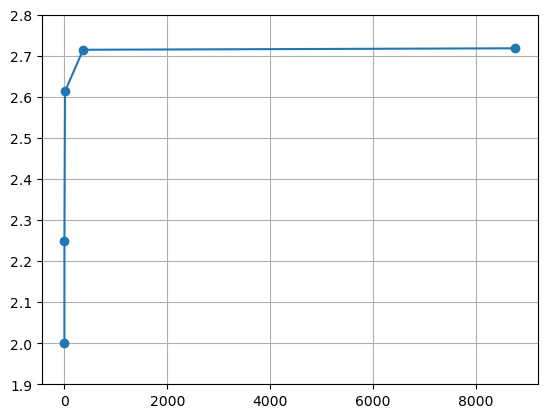

In [6]:
plt.plot(n, interests, marker='o')
plt.ylim(1.9, 2.8)
plt.grid(True)
plt.show()